In [231]:
%matplotlib inline

In [232]:
import numpy as np
import scipy
import scipy.signal
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [233]:
import sympy
from sympy.interactive import printing
printing.init_printing(use_latex=True)

# Analog version

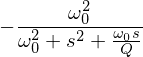

In [234]:
Q, omega_0, s = sympy.symbols("Q omega_0 s")
H_a = -omega_0**2/(s**2 + s*(omega_0/Q) + omega_0**2)
H_a

## Examine frequency response in the analog case

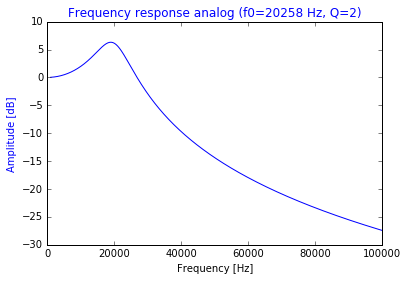

In [241]:
def f(o,q):
    omega_0_val = o #20
    Q_val = q #1/np.sqrt(2)

    a = np.array([1, omega_0_val/Q_val, omega_0_val**2])
    b = np.array([0, 0, omega_0_val**2])

    w, h = scipy.signal.freqs(b, a, 1000)

    plt.plot(w, 20 * np.log10(abs(h)), 'b')
    plt.title('Frequency response analog (f0=%g Hz, Q=%g)' % (o, q), color='b')
    plt.ylabel('Amplitude [dB]', color='b')
    plt.xlabel('Frequency [Hz]')
    plt.show()
    
#f(11E3,1)
widgets.interact(f,o=widgets.IntSlider(min=0,max=44.1E3,step=0.1,value=15E3),q=widgets.FloatSlider(min=0.1,max=2,step=0.05,value=1.0))

# Convert to a digtal IIR of filter

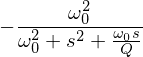

In [236]:
H_a

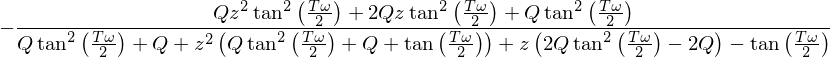

In [237]:
Q, omega, T, z = sympy.symbols("Q omega T z")

#prewarp
omega_a = 2/T*sympy.tan(omega*T/2)
H_a1 = H_a.subs(omega_0, omega_a)

#Bilinear transform
H_a2 = H_a1.subs(s, 2/T*(1-z**(-1))/(1+z**(-1)))
sympy.collect(sympy.cancel(H_a2),z)

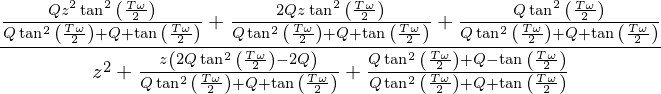

In [238]:
Q, omega, T, z = sympy.symbols("Q omega T z")

factor = Q*sympy.tan(T*omega/2)**2 + Q + sympy.tan(T*omega/2)
a_0 = 1
a_1 = ((2*Q*sympy.tan(T*omega/2)**2 - 2*Q)/factor)
a_2 = ((Q*sympy.tan(T*omega/2)**2 + Q - sympy.tan(T*omega/2))/factor)
b_0 = (Q*sympy.tan(T*omega/2)**2/factor)
b_1 = (2*b_0)
b_2 = (b_0)

H = (b_0*z**2 + b_1*z**1 + b_2*z**0)/(a_0*z**2 + a_1*z**1 + a_2*z**0)
H

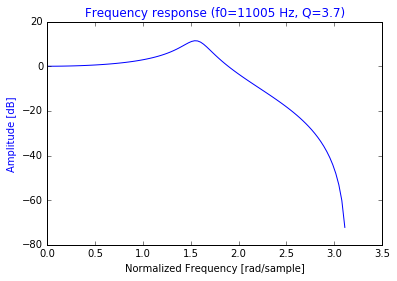

In [239]:
H_tmp = H

# Set wanted values
sample_freq = 44.1E3
T_val = 1/sample_freq
Q_val = 1/np.sqrt(2)

w = np.array([0])
h = np.array([0])
def f_freqz(f_cutoff,Q_val):
    omega_cutoff = f_cutoff * 2 * np.pi #in rads/sec
    omega_val = omega_cutoff

    b_0_val = b_0.subs(T,T_val).subs(Q,Q_val).subs(omega,omega_val)
    b_1_val = b_1.subs(T,T_val).subs(Q,Q_val).subs(omega,omega_val)
    b_2_val = b_2.subs(T,T_val).subs(Q,Q_val).subs(omega,omega_val)
    a_0_val = a_0
    a_1_val = a_1.subs(T,T_val).subs(Q,Q_val).subs(omega,omega_val)
    a_2_val = a_2.subs(T,T_val).subs(Q,Q_val).subs(omega,omega_val)
    
    b = np.array([b_0_val, b_1_val, b_2_val],np.float)
    a = np.array([a_0_val, a_1_val, a_2_val],np.float)
    
    w, h = scipy.signal.freqz(b, a, 100)
    plt.plot(w, 20 * np.log10(abs(h)), 'b')
    plt.title('Frequency response digital IIR (f0=%g Hz, Q=%g)' % (f_cutoff, Q_val), color='b')
    plt.ylabel('Amplitude [dB]', color='b')
    plt.xlabel('Normalized Frequency [rad/sample]')
    plt.show()

widgets.interact(f_freqz,f_cutoff=widgets.IntSlider(min=20,max=22.05E3,step=1,value=15E3),Q_val=widgets.FloatSlider(min=0.1,max=8,step=0.05,value=1.0))